<h2>Question 1</h2>

In [1]:
#reading h5py file
import h5py
import numpy as np
#Reading a h5py file
Data = h5py.File('breast.h5','r')

X,Y,P = Data['images'],np.array(Data['counts']),np.array(Data['id'])
print("images",X)
print("cellcount",Y)
print("person id",P)

images <HDF5 dataset "images": shape (7404, 299, 299, 3), type "|u1">
cellcount [4 4 9 ... 1 1 1]
person id [ 1  1  1 ... 18 18 18]


<b> Part 1 </b>

In [2]:
#Find the count of training images and test images
i =0
for x in range(len(P)):
    if P[x]>=1 and P[x]<=13:
        i=i+1
print("The number of training examples are:",i)
j = 0
for x in range(len(P)):
    if P[x]> 13:
        j=j+1
print("The number of test examples are:",j)

The number of training examples are: 5841
The number of test examples are: 1563


In [3]:
#training images with patient id less than or equal to 13
Xtrain = X[P<=13,:]
Ytrain = Y[P<=13]
#training images with patient greater than or equal to 13
Xtest = X[P>13,:]
Ytest =Y[P>13]

In [4]:
#shape of training and test set
print("Shape of training image set")
print(Xtrain.shape)
print(Ytrain.shape)
print("Shape of test image set")
print(Xtest.shape)
print(Ytest.shape)

Shape of training image set
(5841, 299, 299, 3)
(5841,)
Shape of test image set
(1563, 299, 299, 3)
(1563,)


<b> Part 2</b>

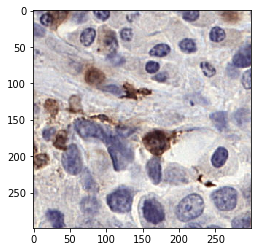

cell count of each training image: 4


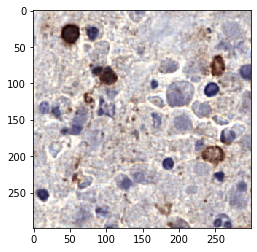

cell count of each training image: 4


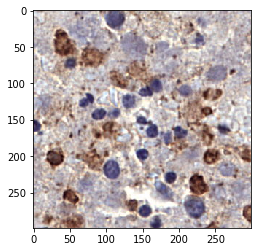

cell count of each training image: 9


In [5]:
#plotting few training images 
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0,3):
    plt.imshow(Xtrain[i])
    plt.show()
    print("cell count of each training image:",Ytrain[i])


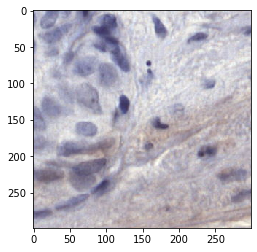

cell count of each test images: 0


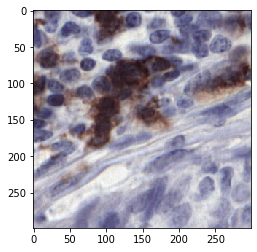

cell count of each test images: 8


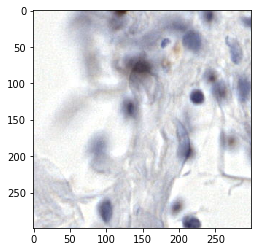

cell count of each test images: 1


In [6]:
#plotting few test images 
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0,3):
    plt.imshow(Xtest[i])
    plt.show()
    print("cell count of each test images:",Ytest[i])

 <b>Describe your observations on what you see in the images and how it correlates with the cell count (target variable)?</b>
 
From the above plotted images , It can be observed that cell count is related to the brown regions (lympocytes) in an image, and It can also be identified that images has lot of noise. 
</br>

Few examples with noise can be identified in below plotted images.
</br>
Sixth image in a training set has lot of brown region , but the actual cell count given is 5 . similarly test image 1503 has 3 brown dots that represents lympocytes but the actual label given 1. 

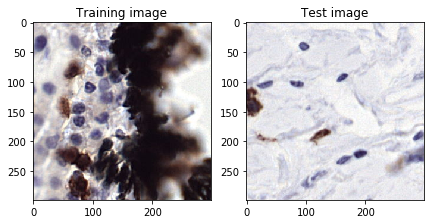

The cell count of training image: 5
The cell count of test image: 1


In [7]:
plt.figure(figsize =(7,7))
#plotting the unusual image of train set
plt.subplot(1,2,1)
plt.imshow(Xtrain[6])
plt.title("Training image")

#plotting the unusual image of test set
plt.subplot(1,2,2)
plt.imshow(Xtest[1503])
plt.title("Test image")
plt.show()

print("The cell count of training image:",Ytrain[6])
print("The cell count of test image:",Ytest[1503])


<b>Part 3</b>

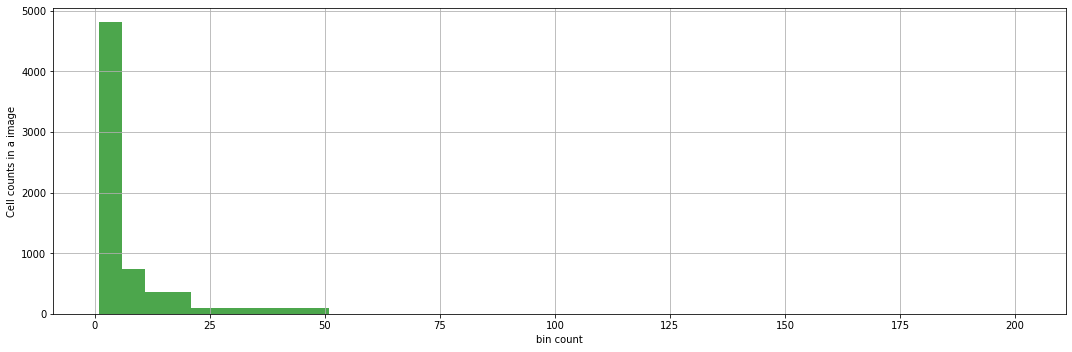

In [8]:
#histogram of image counts 
bin = [1,6,11,21,51,201]
plt.figure(figsize=(15,5))
#plotting histogram
plt.hist(Y ,bins = bin ,color = 'green',alpha = 0.7)
plt.xlabel("bin count")
plt.ylabel("Cell counts in a image")
plt.grid()
plt.tight_layout()
#showing the image
plt.show()

<b> Part 4</b>

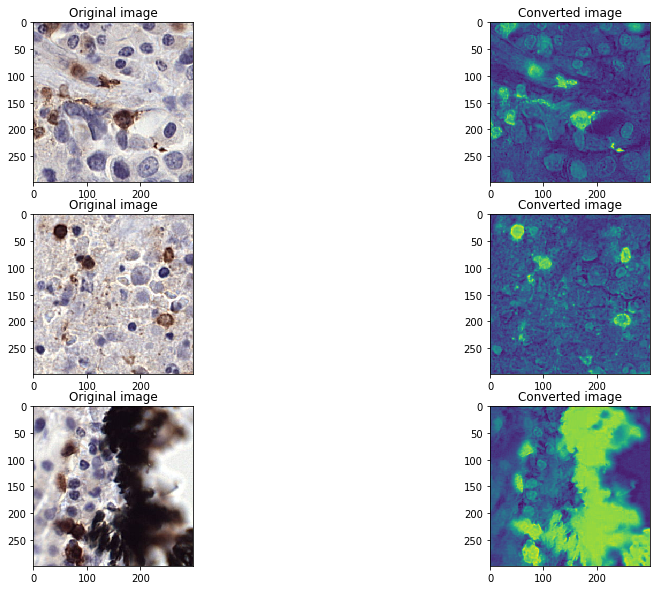

<Figure size 432x288 with 0 Axes>

In [9]:
from skimage.color import rgb2hed
import matplotlib.pyplot as plt
%matplotlib inline
#images
rgb_hed1 = rgb2hed(X[0])
rgb_hed2 = rgb2hed(Xtrain[1])
rgb_hed3 = rgb2hed(X[6])
#plotting image subplots 
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2,figsize =(15,10))
#image of axis 1
ax1.imshow(X[0])
ax1.set_title("Original image")
#image of axis 2
ax2.imshow(rgb_hed1[:, :, 2])
ax2.set_title("Converted image")
#image of axis 3
ax3.imshow(Xtrain[1])
ax3.set_title("Original image")
#image of axis 4
ax4.imshow(rgb_hed2[:, :, 2])
ax4.set_title("Converted image")
#image of axis 5
ax5.imshow(X[6])
ax5.set_title("Original image")
#image of axis 6
ax6.imshow(rgb_hed3[:, :, 2])
ax6.set_title("Converted image")
plt.figure()
plt.tight_layout()
#showing the image
plt.show()

<b> Part 5 </b>

<b> average D channel scatter plot for all images </b>

In [10]:
average = [] 
average1 = [] 
#average D channel of train images
for i in Xtrain:
    rgb_hed = rgb2hed(i)
    mean = np.mean(rgb_hed[:,:,2])
    average.append(mean)
    
#average D channel of test images    
for i in Xtest:
    rgb_hed = rgb2hed(i)
    mean = np.mean(rgb_hed[:,:,2])
    average1.append(mean)

count of all the images 7404
count of cell count for all the images 7404


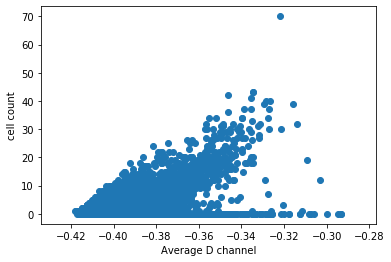

In [11]:
#combined the lists of average train and test
average_list = list(average+average1)
#printing the count of all the images 
print("count of all the images",len(average_list))
print("count of cell count for all the images",len(Y))
#scatter plot
plt.scatter(average_list,Y)
plt.xlabel('Average D channel')
plt.ylabel('cell count')
#showing the scatter plot
plt.show()

In [12]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
cor, _ = pearsonr(average_list, Y)
print('Correlation coefficient: %.3f' % cor)

Correlation coefficient: 0.593


<b>Do you think the feature would be useful?</b>

From the above correlation coefficent score, It can be observed that there is a moderate postive relationship between the average brown channel and cell count of image(target value) and the above scatter plot also indicates that there is a positive correlation with few outliers. Therefore, average brown channel is  a useful feature in regression model.

<b>Part 6</b>

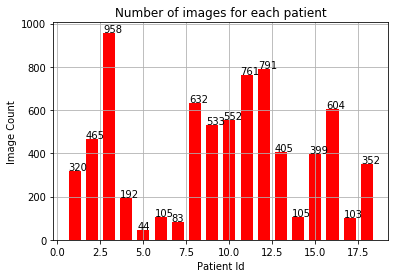

In [13]:
#this returns distinctive array elements
Patientid,freq = np.unique(P, return_counts = True)
#plotting a bar graph for the frequency of images for each patient id
bars = plt.bar(list(range(1,19)),height = freq,width = 0.7,color ='red',)
#printing the text on top of bars
for each in bars:
    y = each.get_height()
    plt.text(each.get_x(),y+4,y)

plt.xlabel('Patient Id')
plt.ylabel('Image Count')
plt.title('Number of images for each patient')
plt.grid()
#plotting the figure
plt.show()

In [14]:
#image count of each patient if drom 1- 18
frequency = zip(Patientid,freq)
for each in frequency:
    print('Patiend Id:',each[0],'Image Count:',each[1])

Patiend Id: 1 Image Count: 320
Patiend Id: 2 Image Count: 465
Patiend Id: 3 Image Count: 958
Patiend Id: 4 Image Count: 192
Patiend Id: 5 Image Count: 44
Patiend Id: 6 Image Count: 105
Patiend Id: 7 Image Count: 83
Patiend Id: 8 Image Count: 632
Patiend Id: 9 Image Count: 533
Patiend Id: 10 Image Count: 552
Patiend Id: 11 Image Count: 761
Patiend Id: 12 Image Count: 791
Patiend Id: 13 Image Count: 405
Patiend Id: 14 Image Count: 105
Patiend Id: 15 Image Count: 399
Patiend Id: 16 Image Count: 604
Patiend Id: 17 Image Count: 103
Patiend Id: 18 Image Count: 352


No of images per each patient doesnot have any impact on regression model since the image count per patient id doesn't related anyway to lymphocytes count in each image.

<b>Part 7</b>

What performance metrics can you use for this purpose? Which one will be the best performance metric for this problem? Please give reasoning 

Regression is about predicting the continous values such as predicting the cell count which ranges from 0 - 70.

<i>Several metrics exists to predict the targets of regression task:</i>
<ul>
    <li>Mean Squared Error</li>
    <li>Root Mean Squared Error</li>
    <li>Mean Absolute Error </li>
    <li>Coefficient of Determination(R²)</li>
    
   
</ul>

Mean Squared Error : It is the average of the squared difference between actual and predicted values by the model.This metric penalises even the small error since it squares the differences and over estimates the badness of model.This metric is very problematic when the data is noisy.

Root Mean Squared Error : It is the square root of the average of the squared difference between actual and predicted values by the regression model.The square rooting before averaging the errors helps penalises the large errors. This metric is very helpful in the situation where you need to penalise the large errors.

Mean Absolute Error: It is the absolute difference between target  and predicted value by the model. MAE weights all the individual differences equally therefore it is more robust to outliers and it doesn't pe

Coefficient of Determination(R²) : This metric shows us how well our model is predicting when compared to baseline model. Even though values are large,R² will be less than or equal to 1 beause the baseline value is chosen by taking mean of the points and drawing a line through the mean .

<!-- Correlation coeffcient: this metrics tells us how good the predicted values correlated with actual values. The higher the correlation the better fit the model is. But, 
 -->
 
 
<i>Since our dataset is noisy and has few outliers <b>Root Mean Squared error</b> is the best metric to use a perfromance metric. Though RMSE is good metric but it is not enough to tell whether our model is performing better. we need constant baseline value to compare our model. Therefore<b> R² and RMSE </b>are better perfromance metrics for our dataset</i>.

<h3>Question No. 2: (Feature Extraction and Classical Regression)</h3>

<b> Part 1</b>

<b>a. average of the “brown”, red, green and blue channels</b>

In [15]:
from skimage.color import rgb2hed
conv = rgb2hed(Xtrain[0])
image = Xtrain[0]
#average of channels including red,green , blue and brown
print("Average of red channel:",np.mean(image[:,:,0]))
print("Average of green channel:",np.mean(image[:,:,1]))
print("Average of blue channel:",np.mean(image[:,:,2]))
print("Average of the brown channel:",np.mean(conv[:, :, 2]))

Average of red channel: 179.0747083365958
Average of green channel: 170.9491169002584
Average of blue channel: 178.14088209304145
Average of the brown channel: -0.3799775017875077


<b>b. variance of the “brown”, red, green and blue channels</b>

In [16]:
conv = rgb2hed(Xtrain[0])
image = Xtrain[0]
#variance of channels including red,green , blue and brown
print("Variance of red channel:", np.var(image[:,:,0]))
print("Variance of green channel:", np.var(image[:,:,1]))
print("Variance of blue channel:", np.var(image[:,:,2]))
print("Variance of the brown channel:", np.var(conv[:,:,2]))

Variance of red channel: 1921.4295144687405
Variance of green channel: 2212.668085734827
Variance of blue channel: 1596.1474098727995
Variance of the brown channel: 0.0005931334288957775


<b>c. entropy of the “brown”, red, green and blue channels</b>

In [17]:
import skimage 
from skimage.measure import shannon_entropy
from skimage import img_as_float64

image = Xtrain[0]
conv = rgb2hed(image)
img = img_as_float64(conv)
#Entropy of channels including red,green , blue and brown
print("Entropy of red channel:", shannon_entropy(image[:,:,0]))
print("Entropy of green channel:", shannon_entropy(image[:,:,1]))
print("Entropy of blue channel:", shannon_entropy(image[:,:,2]))
print("Entropy of brown channel:", shannon_entropy(img_as_float64(img[:,:,2])))

Entropy of red channel: 7.310858010557023
Entropy of green channel: 7.425238868890594
Entropy of blue channel: 7.183782922723389
Entropy of brown channel: 14.209719697835164


<b>d. Histogram of each channel</b>

<Figure size 432x288 with 0 Axes>

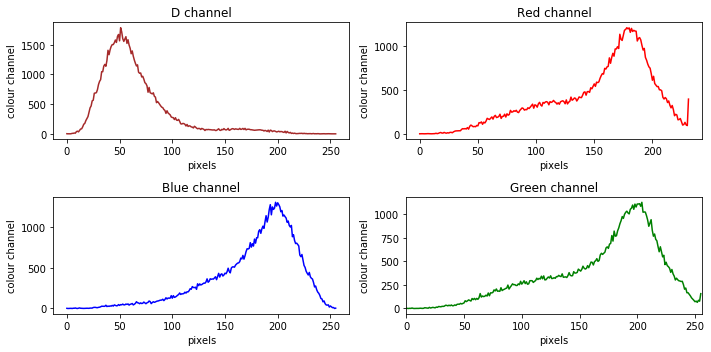

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, exposure, img_as_float64
# create the histogram plot for four channels red , green , blue and brown
fig = plt.figure()
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
#histogram of red channel
histogram, bin_edges = exposure.histogram(image[:, :, 0], nbins=256)
ax[0,1].plot(histogram, color='r')
#histogram of green channel
histogram, bin_edges = exposure.histogram(image[:, :, 1], nbins=256)
ax[1,1].plot(histogram, color='g')
#histogram of blue channel
histogram, bin_edges = exposure.histogram(image[:, :, 2], nbins=256)
ax[1,0].plot( histogram, color='b')
#converting rgb image to hed
img_hed = img_as_float64(rgb2hed(Xtrain[0]))
#histogram of dab channel
histogram, bin_edges = exposure.histogram(img_hed[:,:,2].ravel(), nbins=256)
ax[0,0].plot( histogram, color='brown')
plt.xlim([0, 256])
ax[0,1].set_title('Red channel')
ax[1,1].set_title('Green channel')
ax[1,0].set_title('Blue channel')
ax[0,0].set_title('D channel')
#setting x and y label for all the subplots
ax[0,0].set_xlabel('pixels')
ax[0,0].set_ylabel('colour channel')
ax[0,1].set_xlabel('pixels')
ax[0,1].set_ylabel('colour channel')
ax[1,0].set_xlabel('pixels')
ax[1,0].set_ylabel('colour channel')
ax[1,1].set_xlabel('pixels')
ax[1,1].set_ylabel('colour channel')
#setting the x ticks limit to 0-256
plt.xlim(0,256)
plt.tight_layout()
#plotting the graph
plt.show()

<b> e. PCA Coefficients </b>

In [19]:
#reshaping the image 
# The image numpy ndarray is 4 dimensional array which is(5841*299*299*3)
shape = Xtrain.shape
shape_test = Xtest.shape#1563*299*299*3
reshape_train_image = Xtrain.reshape(shape[0], np.prod(np.array(shape[1:])))
reshape_test_image = Xtest.reshape(shape_test[0], np.prod(np.array(shape_test[1:])))
#we are multiplying 299*299*3 to make a 2d array
print("Training image shape:",reshape_train_image.shape)
print("Test image shape",reshape_test_image.shape)

Training image shape: (5841, 268203)
Test image shape (1563, 268203)


<b>Before applying PCA it is mandatory to normalise the data ,i.e., converting mean to zero and standard devaition as 1 for each feature/variable.</b>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(reshape_train_image)
reshape_train_image = scaler.transform(reshape_train_image)
#reshape_test_image = scaler.transform(reshape_test_image)

<h3>RandomizedPCA</h3>

In [0]:
# initializing pca
from sklearn.decomposition import PCA as RandomizedPCA
import pandas as pd
import matplotlib.pyplot as plt
# PCA for dimensionality redcution 
rand_pca = RandomizedPCA(.95)
rand_pca.fit(reshape_train_image[:3000,:])

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
rand_pca.transform(reshape_train_image[:3000,:])
print("Explained variance ratio:",rand_pca.explained_variance_ratio_)
print("no of components with 95% variance:",rand_pca.n_components_)

Explained variance ratio: [2.43334822e-01 3.30074145e-02 2.98971613e-02 ... 6.57898573e-05
 6.57343602e-05 6.55790711e-05]
no of components with 95% variance: 1187


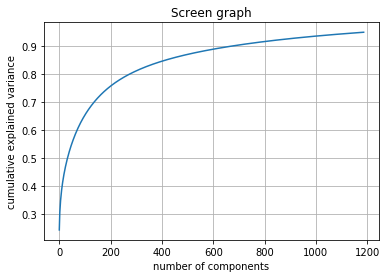

In [0]:
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(np.cumsum(rand_pca.explained_variance_ratio_))
plt.xlabel('number of components');
plt.ylabel('cumulative explained variance');
plt.title("Screen graph")
plt.grid()
plt.show()

PCA was performed on 3000 images as the system was giving memory error . out of 3000, randomised pca selected 1187 components with 95% variance.


<h3>Feature extraction </h3>

<b>Average of colour channels</b>

In [10]:
#average colour channels of training images
from skimage.color import rgb2hed

average_red = []
average_brown = []
average_green =[]
average_blue = []

for i in Xtrain:
    converted_d = rgb2hed(i)
    d_r =  i[:,:,0]#average of redchannel
    d_g = i[:,:,1] #average of greenchannel
    d_b = i[:,:,2]#average of blue channel 
    d =  converted_d[:,:,2]#average of brown channel 
    average_brown.append(np.mean(d))
    average_red.append(np.mean(d_r))
    average_green.append(np.mean(d_g))
    average_blue.append(np.mean(d_b))  


In [11]:
#average colour channels of test images

average_red_test = []
average_brown_test = []
average_green_test =[]
average_blue_test = []

for i in Xtest:
    converted_d = rgb2hed(i)
    d_r_t =  i[:,:,0]#average of redchannel
    d_g_t = i[:,:,1] #average of greenchannel
    d_b_t = i[:,:,2]#average of blue channel 
    d_t =  converted_d[:,:,2]#average of brown channel 
    average_brown_test.append(np.mean(d_t))
    average_red_test.append(np.mean(d_r_t))
    average_green_test.append(np.mean(d_g_t))
    average_blue_test.append(np.mean(d_b_t))  


<b>Variance of colour channels</b>

In [12]:
#variance of training images 

var_red = []
var_brown = []
var_green =[]
var_blue = []

for i in Xtrain:
    
    c = rgb2hed(i)#converted dab brown channel

    v_r =  i[:,:,0]#variance of redchannel
    v_g = i[:,:,1] #variance of greenchannel
    v_b = i[:,:,2]#variance of blue channel 
    v_d =  c[:,:,2]#variance of brown channel 
    var_red.append(np.var(v_r))
    var_green.append(np.var(v_g))
    var_blue.append(np.var(v_b))
    var_brown.append(np.var(v_d)) 
    

In [13]:
#variance of test images 

var_red_test = []
var_brown_test = []
var_green_test =[]
var_blue_test = []

for i in Xtest:
    
    c = rgb2hed(i)#converted dab brown channel

    v_r_t =  i[:,:,0]#variance of redchannel
    v_g_t = i[:,:,1] #variance of greenchannel
    v_b_t = i[:,:,2]#variance of blue channel 
    v_d_t =  c[:,:,2]#variance of brown channel 
    var_red_test.append(np.var(v_r_t))
    var_green_test.append(np.var(v_g_t))
    var_blue_test.append(np.var(v_b_t))
    var_brown_test.append(np.var(v_d_t)) 
    

<b>Entropy of colour channels</b>

In [14]:
#training images
import skimage 
from skimage.measure import shannon_entropy
from skimage import img_as_float64
e_red = []
e_brown = []
e_green =[]
e_blue = []


for i in Xtrain:
    conv = rgb2hed(i)
    
    e_r =  i[:,:,0]#variance of redchannel
    e_g = i[:,:,1] #variance of greenchannel
    e_b = i[:,:,2]#variance of blue channel 
    e_d = conv[:,:,2]#variance of brown channel 
    e_red.append(shannon_entropy(e_r))
    e_green.append(shannon_entropy(e_g))
    e_blue.append(shannon_entropy(e_b))
    e_brown.append(shannon_entropy(img_as_float64(e_d)))    


In [15]:
#test images
import skimage 
from skimage.measure import shannon_entropy
e_red_test = []
e_brown_test  = []
e_green_test =[]
e_blue_test = []


for i in Xtest:
    conv = rgb2hed(i)
    
    e_r_t =  i[:,:,0]#variance of redchannel
    e_g_t = i[:,:,1] #variance of greenchannel
    e_b_t = i[:,:,2]#variance of blue channel 
    e_d_t = conv[:,:,2]#variance of brown channel 
    e_red_test.append(shannon_entropy(e_r_t))
    e_green_test.append(shannon_entropy(e_g_t))
    e_blue_test.append(shannon_entropy(e_b_t))
    e_brown_test.append(shannon_entropy(img_as_float64(e_d_t)))   


<h3> f. Any other features that you think can be useful for this work.</h3>

<b> Average , variance and entropy of rgbcombined channel</b>

Shannon Entropy of originial RGB image can be computed by using probability distribution of images pixel intensities. So entropy of rgb combined might be a helpful featue in detecting the cells.

In [16]:
#training images
import skimage 
from skimage.measure import shannon_entropy

e_rgb =[]
#entropy of combined rgb channel on train image set
for i in Xtrain:
    e_rgb.append(shannon_entropy(img_as_float64(i)))

In [17]:
#test images
import skimage 
from skimage.measure import shannon_entropy

e_rgb_test =[]
#entropy of combined rgb channel on test image set
for i in Xtest:
    e_rgb_test.append(shannon_entropy(img_as_float64(i)))

The pearson correlation coefficient is 0.5 , when calculated between entropy of rgb and cell count of training images,Thus it can be concluded that entropy rgb combined channels is useful feature. 

<b>RGB to HSV</b>

The objects in images have distinct colors (hues) and luminosities, so that these features can be used to separate different areas of the image. In the RGB representation the hue and the luminosity are expressed as a linear combination of the R,G,B channels, whereas they correspond to single channels of the HSV image (the Hue and the Value channels). A simple segmentation of the image can then be effectively performed by a mere thresholding of the HSV channels.

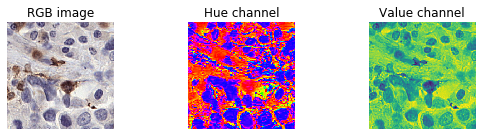

In [18]:
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
hsv_img = rgb2hsv(Xtrain[0])
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(Xtrain[0])
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

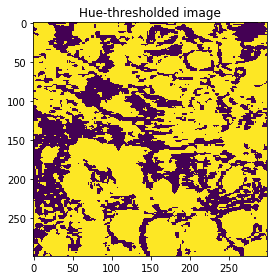

In [19]:
hue_threshold = 0.2
binary_img = hue_img > hue_threshold
plt.imshow(binary_img)
plt.title("Hue-thresholded image")
plt.tight_layout()
plt.show()

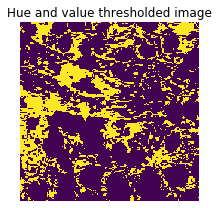

In [20]:
fig, ax0 = plt.subplots(figsize=(4, 3))
hue_threshold = 0.1
value_threshold = 0.10

binary_img = ( hue_img < hue_threshold) |(value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()

It can be observed that, RGB to HSV connversion is not helpful in predicting the lympocytes even after chaning the threshold values of hue and value channels.

<b> Edge detction</b>

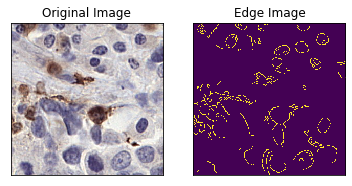

In [21]:
#canny edge detection with rgb
import cv2
image1copy = np.uint8(X[0])
#edge detction rgb with cv2 module
edges = cv2.Canny(image1copy, 200, 400)
#comparing original rgb image with detected edges.
plt.subplot(121),
plt.imshow(X[0])
plt.title('Original Image'),
plt.xticks([]), 
plt.yticks([])
plt.subplot(122),
plt.imshow(edges)
plt.title('Edge Image'),
plt.xticks([]), 
plt.yticks([])
#plotting the images.
plt.show()

The above images indicates the edge detection with rgb. It can observed that it is detecting the other cells with lympocytes .Edge detection may not be the useful features to predict the cell count of lympocytes.

Edge detection with grey channel

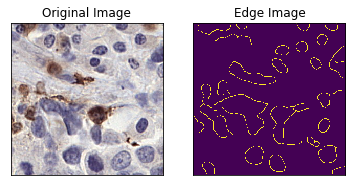

In [22]:
#edge detection with grey channel 
from skimage.feature import canny
from skimage.color import rgb2gray
img_gray = rgb2gray(X[0])
#edge detection of celk counts using skimage canny detection
edges = canny(img_gray, sigma=5.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)
#comparing original and canny edges with grey channel
plt.subplot(121),
plt.imshow(X[0])
plt.title('Original Image'),
plt.xticks([]), 
plt.yticks([])
plt.subplot(122),
plt.imshow(edges)
plt.title('Edge Image'),
plt.xticks([]), 
plt.yticks([])
#plotting the images
plt.show()

Different cell can be identified  with lympocytes using edge detection with grey channel 
Different sigma values has been used to detect the lympocytes, but canny edge detection proved to be useless since the image has different kind of cells with kind of edges

<b>histogram of oriented Gradients</b>

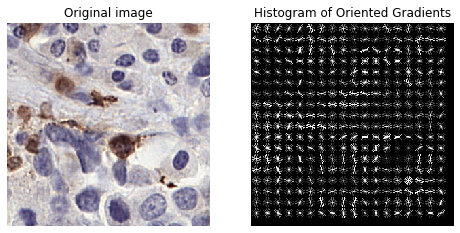

In [23]:
#since edge detection didnt work in detecting lympocytes, I have tried histogram of oriented Gradients
from skimage.feature import hog,greycomatrix
from skimage import data, exposure
fd, hog_image = hog(X[0], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
#comapring original image and histogram of gradients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(X[0], cmap=plt.cm.gray)
ax1.set_title('Original image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
#plotting the images
plt.show()

In Image procesing techniques,histogram of oriented Gradients tends to be helpful in object detection . From the above plot , it can be identified that HoG is not an useful feature to extract since the image has similar type of cells  

<b>Blob_dog</b>

In [25]:
from skimage.feature import blob_dog
img = blob_dog(X[6],threshold=1.1,min_sigma=1, max_sigma=50, sigma_ratio=1.6)
print("No of cell count given by blob:",len(img[:,-1]))
print("Actual cell count:",Y[6])

No of cell count given by blob: 7
Actual cell count: 5


Since blob_dog is giving the cell count approximately to actual cell count for a given image. Therefore I have tried this feature for all the images and calculated the correlation between the feature and cell count. But, blob_count has shown only 0.069817 correlation with cell count. Thus, I have decided to not using this feature.

In conclusion, I have found entropy_rgb is a useful feature in detecting the lympocytes.

<b>Correlation of extacted features with cellcount</b> 

In [46]:
#creating training dataset 
import pandas as pd
trainingdf = pd.DataFrame({'average_red':average_red,'average_green':average_green,'average_blue':average_blue,"entropy_rgb":e_rgb,'average_brown':average_brown,'variance_red':var_red,"var_green":var_green,"var_blue":var_blue,"var_brown":var_brown,"entropy_red":e_red,"entropy_brown":e_brown,"entropy_green":e_green,"entropy_blue":e_blue})
trainingdf['cellcount'] = Ytrain
#finding correlation between extracted features and cell count
correlation_max = trainingdf.corr()
print(correlation_max["cellcount"].sort_values(ascending=False))

cellcount        1.000000
average_brown    0.553937
entropy_blue     0.493524
entropy_brown    0.437105
entropy_rgb      0.431644
entropy_green    0.420265
entropy_red      0.387231
var_brown        0.380202
var_blue         0.257295
var_green        0.193213
variance_red     0.111812
average_red     -0.363752
average_green   -0.429354
average_blue    -0.493959
Name: cellcount, dtype: float64


In [47]:
#test dataset 
testdf = pd.DataFrame({'average_red':average_red_test,'average_green':average_green_test,'average_blue':average_blue_test,"entropy_rgb":e_rgb_test,'average_brown':average_brown_test,'variance_red':var_red_test,"var_green":var_green_test,"var_blue":var_blue_test,"var_brown":var_brown_test,"entropy_red":e_red_test,"entropy_brown":e_brown_test,"entropy_green":e_green_test,"entropy_blue":e_blue_test})
#combined dataset to find the correlation between all images for heat map
df_row = pd.concat([trainingdf,testdf],ignore_index = True)
df_row.drop(['cellcount'], axis=1,inplace=True)
df_row['cellcount'] = Y

<b>Training dataset</b>

This training dataset includes cell count so the features in this dataset is 14 including 13 extracted features. 

In [48]:
print(trainingdf.shape)

(5841, 14)


In [49]:
trainingdf.head()

,average_red,average_green,average_blue,entropy_rgb,average_brown,variance_red,var_green,var_blue,var_brown,entropy_red,entropy_brown,entropy_green,entropy_blue,cellcount
0,179.074708,170.949117,178.140882,7.326910,-0.379978,1921.429514,2212.668086,1596.147410,0.000593,7.310858,14.209720,7.425239,7.183783,4
1,191.574524,182.315600,185.071722,7.137875,-0.381541,1565.206874,1772.910888,1387.077014,0.000532,7.097496,14.180012,7.225434,7.027263,4
2,177.908916,163.731468,164.097930,7.383671,-0.366596,1742.897454,2142.247071,1897.368057,0.000893,7.269907,14.717619,7.446309,7.358879,9
3,187.598550,178.284661,180.630150,7.084553,-0.378776,1300.150110,1580.869595,1395.803178,0.000627,7.027472,14.221918,7.163681,7.008503,5
4,175.579692,168.783884,178.522992,7.404226,-0.381788,2047.151648,2323.710489,1610.191485,0.000603,7.423181,14.004489,7.520183,7.140365,6


<b>Testing dataset</b>

Test dataframe doesnt contain cell count column

In [50]:
print(testdf.shape)

(1563, 13)


In [51]:
testdf.head()

,average_red,average_green,average_blue,entropy_rgb,average_brown,variance_red,var_green,var_blue,var_brown,entropy_red,entropy_brown,entropy_green,entropy_blue
0,180.873424,176.368877,188.424369,6.889624,-0.389404,968.326861,1052.403208,687.886074,0.000208,6.893266,13.366484,6.985664,6.702329
1,148.024194,142.256843,159.099641,7.590929,-0.373897,2199.556411,2692.556105,2435.466140,0.001055,7.521446,14.233424,7.654840,7.487270
2,209.786792,210.775786,217.242033,6.800589,-0.404195,1335.584670,1405.932290,944.639869,0.000223,6.874224,12.363948,6.856487,6.621201
3,179.272950,179.098489,195.854152,6.947013,-0.396882,1282.280327,1400.677350,924.207685,0.000294,7.022661,12.445951,7.035673,6.575395
4,123.008837,119.593718,141.666257,7.460408,-0.367553,1611.263353,2051.863883,1832.714143,0.000833,7.288994,14.193521,7.485728,7.412138


<b>Heat Map of extacted features for all the images</b>

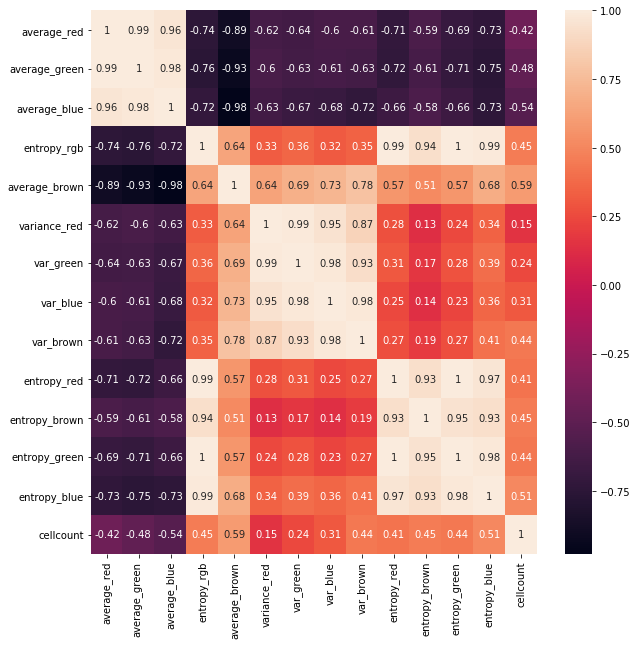

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
#plotting the heat map
sns.heatmap(df_row.corr(),annot= True)

<b>Scatter plot of extacted features with cell count for all the images</b>

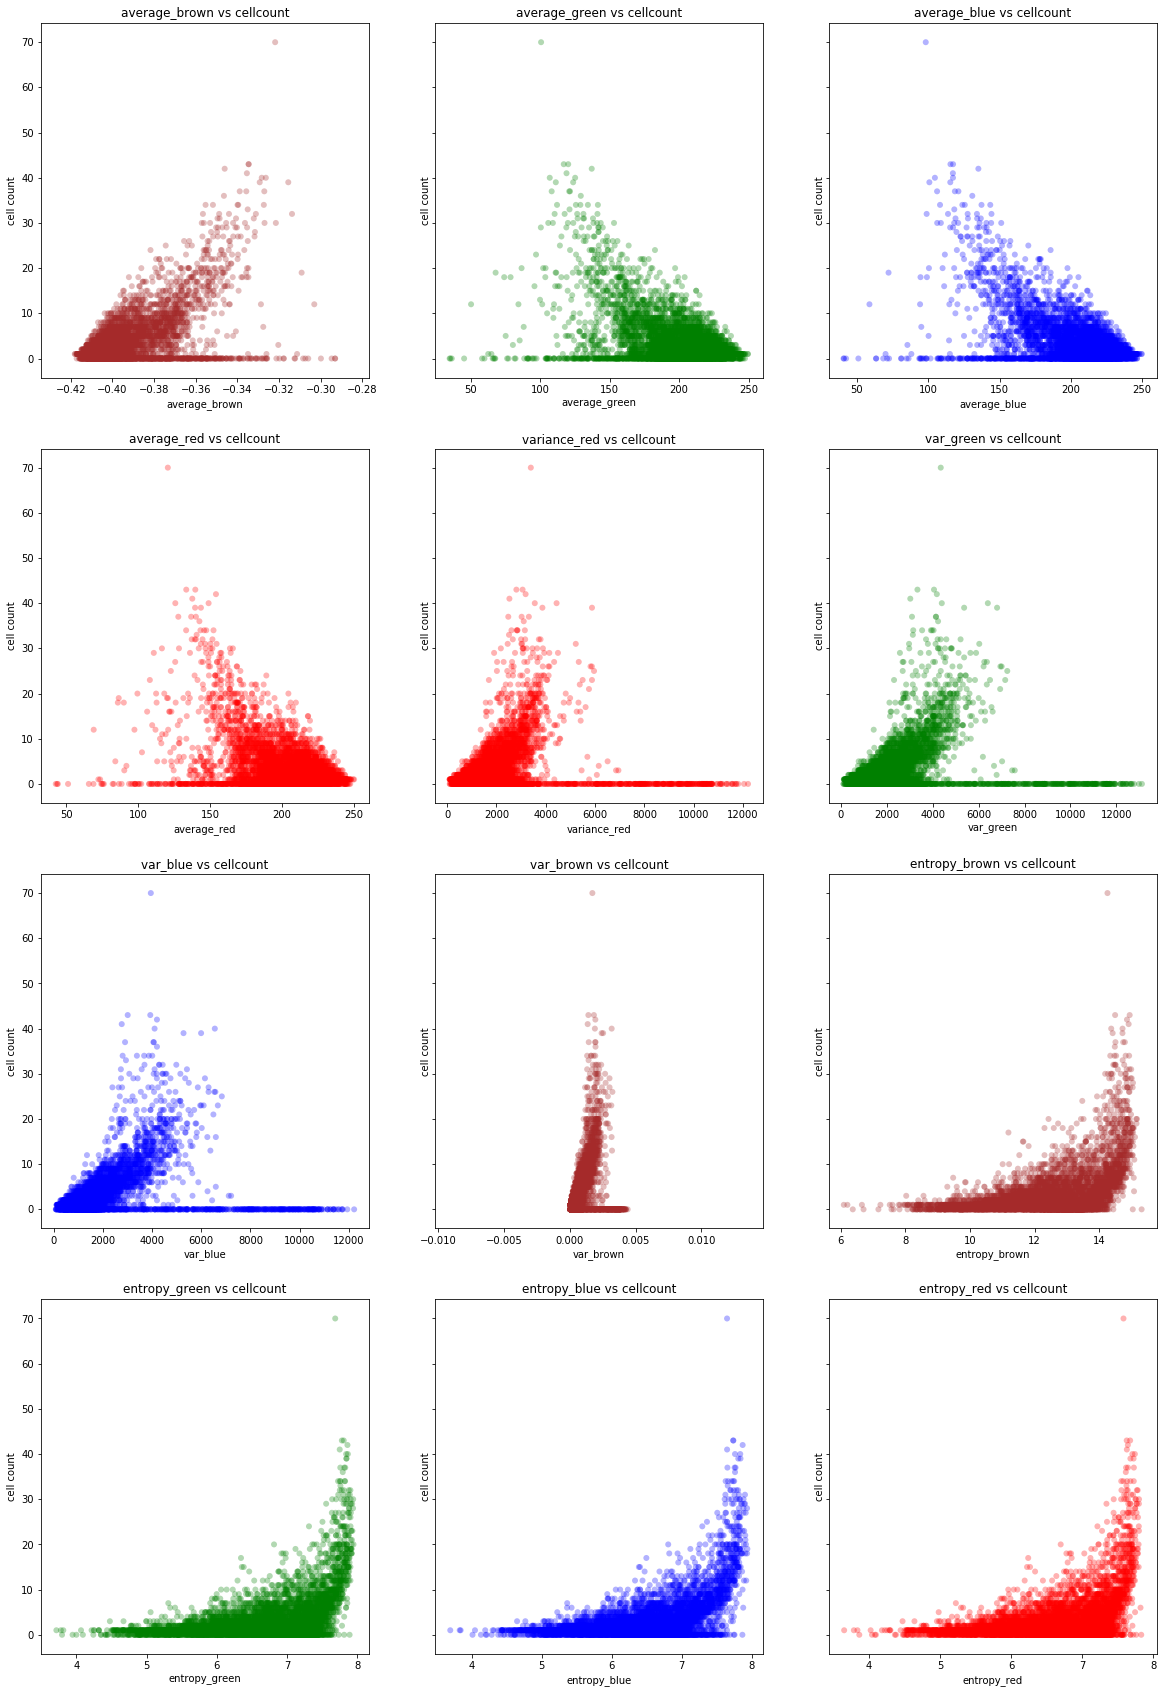

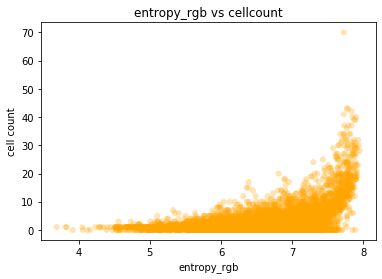

In [28]:
import matplotlib.pyplot as plt
#scatter plot of all the  features with target value
fig, ((ax1, ax2 ,ax3),(ax4,ax5, ax6), (ax7,ax8,ax9),(ax10 , ax11, ax12)) = plt.subplots(nrows=4, ncols=3,figsize=(20,30),sharey = True)
#first feature
ax1.scatter(df_row['average_brown'], df_row['cellcount'], c='brown', 
               alpha=0.3, edgecolors='none')

ax1.set_title('average_brown vs cellcount')
ax1.set_xlabel('average_brown')
ax1.set_ylabel('cell count')

#second feature
ax2.scatter(df_row['average_green'], df_row['cellcount'], c='green', 
               alpha=0.3, edgecolors='none')

ax2.set_title('average_green vs cellcount')
ax2.set_xlabel('average_green')
ax2.set_ylabel('cell count')
#third feature
ax3.scatter(df_row['average_blue'], df_row['cellcount'], c='blue', 
               alpha=0.3, edgecolors='none')

ax3.set_title('average_blue vs cellcount')
ax3.set_xlabel('average_blue')
ax3.set_ylabel('cell count')
#fourth feature
ax4.scatter(df_row['average_red'], df_row['cellcount'], c='r',
               alpha=0.3, edgecolors='none')

ax4.set_title('average_red vs cellcount')
ax4.set_xlabel('average_red')
ax4.set_ylabel('cell count')
#fifth feature
ax5.scatter(df_row['variance_red'], df_row['cellcount'], c='r',
               alpha=0.3, edgecolors='none')

ax5.set_title('variance_red vs cellcount')
ax5.set_xlabel('variance_red')
ax5.set_ylabel('cell count')
#sixth feature
ax6.scatter(df_row['var_green'], df_row['cellcount'], c='g', 
               alpha=0.3, edgecolors='none')

ax6.set_title('var_green vs cellcount')
ax6.set_xlabel('var_green')
ax6.set_ylabel('cell count')
#seventh feature

ax7.scatter(df_row['var_blue'], df_row['cellcount'], c='b', 
               alpha=0.3, edgecolors='none')

ax7.set_title('var_blue vs cellcount')
ax7.set_xlabel('var_blue')
ax7.set_ylabel('cell count')
#eigth feature

ax8.scatter(df_row['var_brown'], df_row['cellcount'], c='brown',
               alpha=0.3, edgecolors='none')

ax8.set_title('var_brown vs cellcount')
ax8.set_xlabel('var_brown')
ax8.set_ylabel('cell count')
#9th feature
ax9.scatter(df_row['entropy_brown'], df_row['cellcount'], c='brown',
               alpha=0.3, edgecolors='none')
ax9.set_title('entropy_brown vs cellcount')
ax9.set_xlabel('entropy_brown')
ax9.set_ylabel('cell count')
#10th feature
ax10.scatter(df_row['entropy_green'], df_row['cellcount'], c='g', 
               alpha=0.3, edgecolors='none')
ax10.set_title('entropy_green vs cellcount')
ax10.set_xlabel('entropy_green')
ax10.set_ylabel('cell count')
#11th feature
ax11.scatter(df_row['entropy_blue'], df_row['cellcount'], c='blue',
               alpha=0.3, edgecolors='none')
ax11.set_title('entropy_blue vs cellcount')
ax11.set_xlabel('entropy_blue')
ax11.set_ylabel('cell count')
#12th feature
ax12.scatter(df_row['entropy_red'],df_row['cellcount'], c='r',
               alpha=0.3, edgecolors='none')
ax12.set_title('entropy_red vs cellcount')
ax12.set_xlabel('entropy_red')
ax12.set_ylabel('cell count')

plt.show()
plt.figure()
#13th feature
plt.scatter(df_row['entropy_rgb'], df_row['cellcount'], c='orange', 
               alpha=0.3, edgecolors='none')
plt.title('entropy_rgb vs cellcount')
plt.xlabel('entropy_rgb')
plt.ylabel('cell count')
plt.show()

<h3> Part - 2 </h3>

<h3>Ordinary least squares</h3>

/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


fold: 1
Weights: [-6.85139678e-01  2.01645066e-01  1.29910079e+00 -4.27441402e+01
  1.58463256e+03  3.50084472e-03  6.67158876e-03 -2.38771188e-02
  3.52431423e+04  6.05516637e+00 -9.88470197e-01  2.27287514e+01
  1.57514089e+01]
intercept: 461.55063552760566


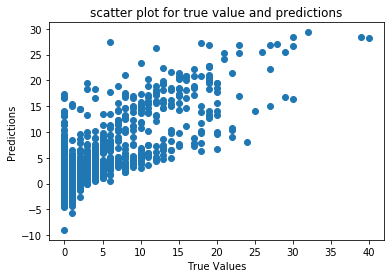

Root Mean Squared error: 3.448
Pearsons correlation: 0.796
R2 score: 0.547
fold: 2
Weights: [-6.34998953e-01  6.78108640e-02  1.41875682e+00 -4.13001855e+01
  1.60423052e+03  6.23734576e-03  3.21938926e-03 -2.32719872e-02
  3.67740869e+04  2.61180230e+00 -1.29884088e+00  2.46627236e+01
  1.68563563e+01]
intercept: 458.64231646729337


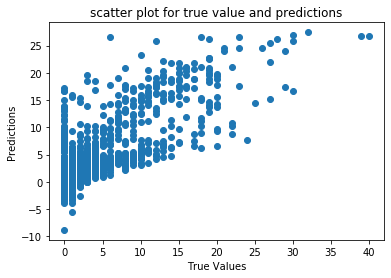

Root Mean Squared error: 3.533
Pearsons correlation: 0.786
R2 score: 0.524
fold: 3
Weights: [-6.55780459e-01  5.76315194e-02  1.49034607e+00 -4.14561785e+01
  1.68528435e+03  6.11867258e-03  2.71276287e-03 -2.19132497e-02
  3.48454276e+04  2.59363857e+00 -1.31614823e+00  2.57445511e+01
  1.58794320e+01]
intercept: 482.8784821723839


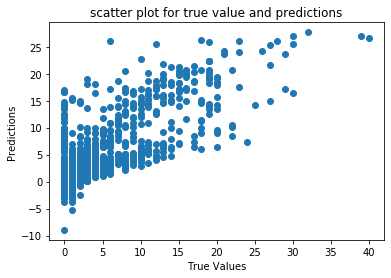

Root Mean Squared error: 3.461
Pearsons correlation: 0.788
R2 score: 0.543


In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score

R2_ols = []
rmse_ols =[]
corre_ols = []

#splitting the dataframe into labels and feature set
y_trainingdf = trainingdf['cellcount']

X_trainingdf = trainingdf.loc[:, trainingdf.columns != 'cellcount']


#using 3 fold cross validation to split train and test data
crss_val = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
i = 0
for train_index, test_index in crss_val.split(X_trainingdf,y_trainingdf):
    i = i+1
    print("fold:",i)
    X_train, X_test, y_train, y_test = X_trainingdf.iloc[train_index], X_trainingdf.iloc[test_index], y_trainingdf.iloc[train_index], y_trainingdf.iloc[test_index]
    #initialsing the model
    regr = LinearRegression(fit_intercept = True).fit(X_train, y_train)
    print('Weights:',regr.coef_)
    print("intercept:",regr.intercept_)
    #prediction on testset
    pred_ols = regr.predict(testdf)
    #scatter plot of model prediction and actual labels
    plt.scatter(Ytest, pred_ols)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title('scatter plot for true value and predictions')
    plt.show()
    #evaluation metrics
    score = mean_squared_error(Ytest, pred_ols,squared=False)
    print("Root Mean Squared error: %.3f"%score)
    rmse_ols.append(score)
        
    corr, _ = pearsonr(Ytest, pred_ols)
    print('Pearsons correlation: %.3f' % corr)
    corre_ols.append(corr)
    
    score_r2 = r2_score(Ytest, pred_ols)
    print('R2 score: %.3f' % score_r2)
    R2_ols.append(score_r2)

<b>Average cross validation score</b>

In [53]:
from statistics import mean 
print("Average Root Mean Squared Error",mean(rmse_ols))
print("Average R2",mean(R2_ols))
print("Average Pearsons correlation",mean(corre_ols))

Average Root Mean Squared Error 3.4806329406374936
Average R2 0.5383186918095774
Average Pearsons correlation 0.7903077111779171


<h3>Ridge Regression</h3>

/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


fold: 1
Weights: [ 1.55005518e-02  4.19806691e-01 -5.70569434e-01 -3.84494018e+01
  8.08796602e+00 -6.04384552e-03  6.43856972e-03 -1.26089091e-03
  1.29905665e+00  8.07464259e+00 -2.14021849e-01  2.52243754e+01
  4.94830717e+00]
intercept: 39.84823226289524


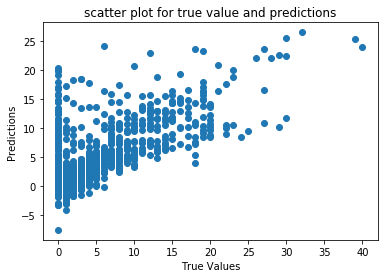

Root Mean Squared error: 3.759
Pearsons correlation: 0.713
R2 score: 0.461
fold: 2
Weights: [ 8.54165859e-02  2.38508484e-01 -4.31069452e-01 -3.73537487e+01
  7.59059532e+00 -2.45090032e-03  1.21803388e-03  1.03335059e-03
  1.38014084e+00  2.85917457e+00 -6.56129514e-01  2.90176162e+01
  6.62961641e+00]
intercept: 30.181849044665285


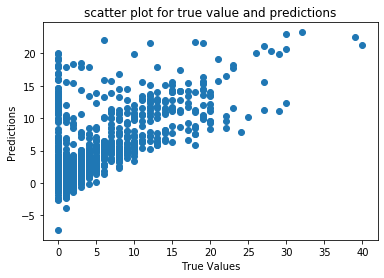

Root Mean Squared error: 3.856
Pearsons correlation: 0.692
R2 score: 0.434
fold: 3
Weights: [ 1.54715847e-01  1.76421718e-01 -4.31244120e-01 -3.43685381e+01
  7.43152676e+00 -1.66774562e-03  3.33286629e-04  1.23361567e-03
  1.29396262e+00  3.41797299e+00 -7.23769053e-01  2.72713099e+01
  5.05946013e+00]
intercept: 27.804303316010266


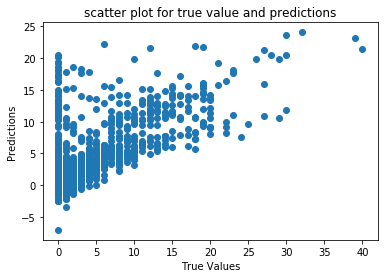

Root Mean Squared error: 3.894
Pearsons correlation: 0.683
R2 score: 0.422


In [31]:
from sklearn.linear_model import Ridge

R2_ridge = []
rmse_ridge =[]
corre_ridge = []



#using 3 fold cross validation to split train and test data
crss_val = StratifiedKFold(n_splits=3, random_state=42, shuffle= True)
i = 0
for train_index, test_index in crss_val.split(X_trainingdf,y_trainingdf):
    i = i+1
    print("fold:",i)
    X_train, X_test, y_train, y_test = X_trainingdf.iloc[train_index], X_trainingdf.iloc[test_index], y_trainingdf.iloc[train_index], y_trainingdf.iloc[test_index]
    #initialsing the model
    reg = Ridge(alpha=0.1,fit_intercept = True).fit(X_train, y_train)
    print('Weights:',reg.coef_)
    print("intercept:",reg.intercept_)
    #prediction on test set
    Ypred_ridge = reg.predict(testdf)
    
    #scatter plot test and prediction results
    plt.scatter(Ytest, Ypred_ridge)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title('scatter plot for true value and predictions')
    plt.show()
    #evaluation metrics
    score = mean_squared_error(Ytest, Ypred_ridge,squared=False)
    print("Root Mean Squared error: %.3f"%score)
    rmse_ridge.append(score)
    
    corr, _ = pearsonr(Ytest, Ypred_ridge)
    print('Pearsons correlation: %.3f' % corr)
    corre_ridge.append(corr)
    
    score_r2 = r2_score(Ytest, Ypred_ridge)
    print('R2 score: %.3f' % score_r2)
    R2_ridge.append(score_r2)

In [32]:
print("Average Root Mean Squared Error",mean(rmse_ridge))
print("Average R2",mean(R2_ridge))
print("Average Pearsons correlation",mean(corre_ridge))

Average Root Mean Squared Error 3.8365353632952535
Average R2 0.4390169043875334
Average Pearsons correlation 0.6961867737661382


<h3>Support Vector Regression</h3>

In [ ]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# #providing the parameters to pick the best one 
# # Cs = [1,10,20,30,40,50,60,80,100]
# # gammas = [0.001,0.01,0.1,1]
# kernel = ['rbf','poly','linear']
# reg_svc = SVR()#initialising the SVR regressor
# sk_fold = StratifiedKFold(n_splits=3, shuffle= True, random_state=None)
# param = {'kernel' : kernel}#creating the parameters 
# clf = GridSearchCV(reg_svc,param,refit=True,cv=sk_fold)#initialising the grid serach cv to hypertune the parameters
# clf.fit(X_trainingdf,y_trainingdf)#fit a model on training data
# print(clf.best_params_)

/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


When Gridsearch CV was performed with Support vector regressor on all the kernels, 'rbf' has proven to be the best kernel since the data is non linear .

/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


fold: 1


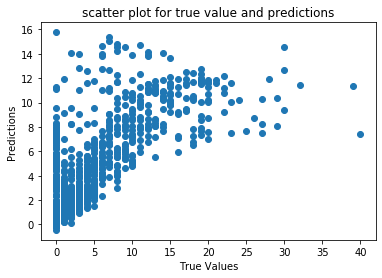

Root Mean Squared error: 3.410
Pearsons correlation: 0.756
R2 score: 0.557
fold: 2


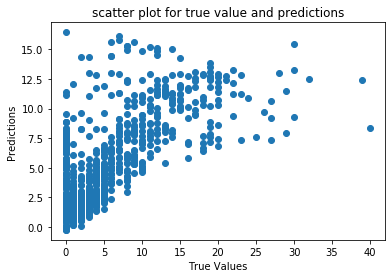

Root Mean Squared error: 3.370
Pearsons correlation: 0.760
R2 score: 0.567
fold: 3


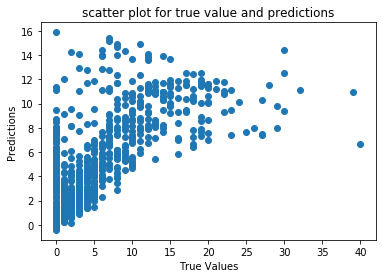

Root Mean Squared error: 3.439
Pearsons correlation: 0.751
R2 score: 0.549


In [33]:
from sklearn.svm import SVR

R2_svr = []
rmse_svr =[]
corre_svr = []


#using 3 fold cross validation to split train and test data
crss_val = StratifiedKFold(n_splits=3, random_state=42, shuffle= True)
i = 0
for train_index, test_index in crss_val.split(X_trainingdf,y_trainingdf):
    i = i+1
    print("fold:",i)
    X_train, X_test, y_train, y_test = X_trainingdf.iloc[train_index], X_trainingdf.iloc[test_index], y_trainingdf.iloc[train_index], y_trainingdf.iloc[test_index]
    #initialsing the model
    regressor_svr = SVR(kernel='rbf')
    #fitting the model
    regressor_svr.fit(X_train,y_train)
    
    #prediction on test set
    Ypred_svr = regressor_svr.predict(testdf)
    
    #scatter plot test and prediction results
    plt.scatter(Ytest, Ypred_svr)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title('scatter plot for true value and predictions')
    plt.show()
    #evaluation metrics
    score = mean_squared_error(Ytest, Ypred_svr,squared=False)
    print("Root Mean Squared error: %.3f"%score)
    rmse_svr.append(score)
    
    corr, _ = pearsonr(Ytest, Ypred_svr)
    print('Pearsons correlation: %.3f' % corr)
    corre_svr.append(corr)
    
    score_r2 = r2_score(Ytest, Ypred_svr)
    print('R2 score: %.3f' % score_r2)
    R2_svr.append(score_r2)

In [35]:
print("Average Root Mean Squared Error",mean(rmse_svr))
print("Average R2",mean(R2_svr))
print("Average Pearsons correlation",mean(corre_svr))

Average Root Mean Squared Error 3.406162338754565
Average R2 0.5578837010567606
Average Pearsons correlation 0.7554791042798801


<h3>Multilayer perceptron</h3>

Using TensorFlow backend.
/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Geethika/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Geethika/opt/anaconda3/lib/p

fold 1

Train on 3894 samples, validate on 1947 samples
Epoch 1/100
3894/3894 [==============================] - 5s 1ms/step - loss: 20.5959 - val_loss: 27.1926
Epoch 2/100
3894/3894 [==============================] - 2s 403us/step - loss: 15.0689 - val_loss: 19.7023
Epoch 3/100
3894/3894 [==============================] - 1s 321us/step - loss: 11.7348 - val_loss: 12.0393
Epoch 4/100
3894/3894 [==============================] - 1s 358us/step - loss: 10.6496 - val_loss: 9.5847
Epoch 5/100
3894/3894 [==============================] - 1s 379us/step - loss: 10.2477 - val_loss: 9.1590
Epoch 6/100
3894/3894 [==============================] - 2s 396us/step - loss: 8.9643 - val_loss: 10.8138
Epoch 7/100
3894/3894 [==============================] - 2s 633us/step - loss: 9.1301 - val_loss: 10.0891
Epoch 8/100
3894/3894 [==============================] - 2s 499us/step - loss: 9.2745 - val_loss: 8.4121
Epoch 9/100
3894/3894 [==============================] - 2s 481us/step - loss: 8.4564 - val_loss

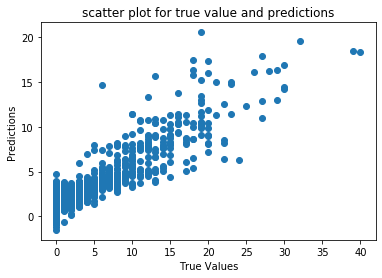

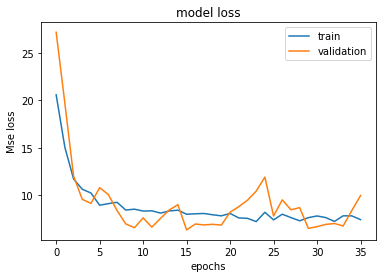

Pearsons correlation: 0.9028505043632848
R2 score: 0.667
Root Mean Squared error:2.9567273458420806
fold 2
Train on 3894 samples, validate on 1947 samples
Epoch 1/100
3894/3894 [==============================] - 8s 2ms/step - loss: 22.1899 - val_loss: 20.0614
Epoch 2/100
3894/3894 [==============================] - 1s 338us/step - loss: 16.2965 - val_loss: 14.9767
Epoch 3/100
3894/3894 [==============================] - 1s 350us/step - loss: 12.4250 - val_loss: 13.5000
Epoch 4/100
3894/3894 [==============================] - 1s 327us/step - loss: 10.3860 - val_loss: 8.9152
Epoch 5/100
3894/3894 [==============================] - 1s 306us/step - loss: 10.2368 - val_loss: 9.8898
Epoch 6/100
3894/3894 [==============================] - 1s 347us/step - loss: 9.6849 - val_loss: 8.0554
Epoch 7/100
3894/3894 [==============================] - 1s 351us/step - loss: 8.9402 - val_loss: 8.3660
Epoch 8/100
3894/3894 [==============================] - 2s 390us/step - loss: 8.5279 - val_loss: 8.7565

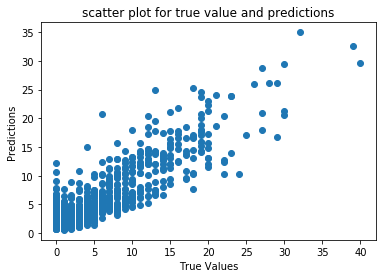

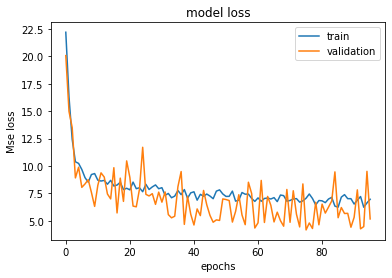

Pearsons correlation: 0.8935300702195957
R2 score: 0.796
Root Mean Squared error:2.3110968217886576
fold 3
Train on 3894 samples, validate on 1947 samples
Epoch 1/100
3894/3894 [==============================] - 5s 1ms/step - loss: 19.3505 - val_loss: 27.2504
Epoch 2/100
3894/3894 [==============================] - 1s 307us/step - loss: 12.9607 - val_loss: 22.8553
Epoch 3/100
3894/3894 [==============================] - 1s 304us/step - loss: 10.5156 - val_loss: 11.4907
Epoch 4/100
3894/3894 [==============================] - 1s 301us/step - loss: 9.3592 - val_loss: 12.0798
Epoch 5/100
3894/3894 [==============================] - 1s 310us/step - loss: 8.8311 - val_loss: 10.8568
Epoch 6/100
3894/3894 [==============================] - 2s 410us/step - loss: 8.0176 - val_loss: 9.9749
Epoch 7/100
3894/3894 [==============================] - 1s 350us/step - loss: 7.7818 - val_loss: 9.5574
Epoch 8/100
3894/3894 [==============================] - 1s 363us/step - loss: 7.2493 - val_loss: 8.9348

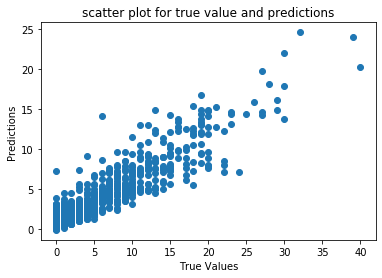

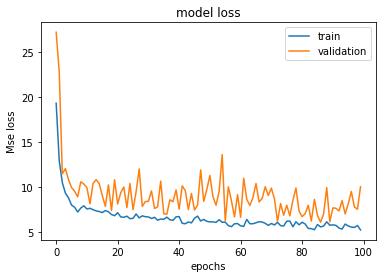

Pearsons correlation: 0.921266350462367
R2 score: 0.716
Root Mean Squared error:2.7291813038669397


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,normalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model

R2_mlp = []
rmse_mlp =[]
corre_mlp = []
# train and test dataset
count = 0
trainy = trainingdf['cellcount']
trainX = trainingdf.loc[:, trainingdf.columns != 'cellcount']
Y_test = pd.DataFrame(Ytest)
crss_val = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in crss_val.split(trainX,trainy):
    count+= 1
    print("fold",count)
    #splitting test and validation set
    X_train, X_val, Y_train, Y_val = trainX.iloc[train_index], trainX.iloc[test_index], trainy.iloc[train_index], trainy.iloc[test_index]

    #creating a model
    MLP = Sequential()
    #adding model layers
    MLP.add(Dense(150, input_dim=X_train.shape[1]))
    #reguralisation
    MLP.add(normalization.BatchNormalization())
    MLP.add(Dropout(rate=0.2))
    # hidden layer
    MLP.add(Dense(50))
    MLP.add(LeakyReLU(alpha=0.05))#leakyrelu
    MLP.add(Dropout(rate=0.2))#reguralisation
    MLP.add(normalization.BatchNormalization())
    #2nd hidden layer
    MLP.add(Dense(10))
    MLP.add(LeakyReLU(alpha=0.01))
    MLP.add(normalization.BatchNormalization())#batch normalisation
    #output layer
    MLP.add(Dense(1,activation ='linear'))
    MLP.compile(loss="mse", optimizer="adam")#adam optmiser
    #early stopping to avoid overtraining
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience= 20)
    history = MLP.fit(X_train ,Y_train, epochs=100,validation_data=(X_val, Y_val),shuffle=True,callbacks=[es])
    #prediction on test set
    ypred_mlp = MLP.predict(testdf)
    ypred_mlp = pd.DataFrame(ypred_mlp)
    
    #scatter plot test and prediction results
    plt.scatter(Y_test, ypred_mlp)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title('scatter plot for true value and predictions')
    plt.show()
    #plot of loss 
    import matplotlib.pyplot as plt
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Mse loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    #evaluation metrics
    cor = Y_test[0].corr(ypred_mlp[0])  
    print("Pearsons correlation:",cor)
    corre_mlp.append(cor)
    
    score_r2 = r2_score(Y_test,ypred_mlp)
    print('R2 score: %.3f' % score_r2)
    R2_mlp.append(score_r2)
    
    score = mean_squared_error(Y_test,ypred_mlp,squared=False)
    print("Root Mean Squared error:{}".format(score))
    rmse_mlp.append(score)

<b>Average Cross validation score</b>

In [37]:
print("Average Root Mean Squared Error",mean(rmse_mlp))
print("Average R2",mean(R2_mlp))
print("Average Pearsons correlation",mean(corre_mlp))

Average Root Mean Squared Error 2.665668490499226
Average R2 0.7265133591876232
Average Pearsons correlation 0.9058823083484159


<h3> Convolutional Neural Networks</h3>

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import load_model
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


Neural networks are poor at justifying why the desicion has been taken or specific prediction has been made.
CNN's are developed to work with image recognition task. it's structure suggests that it should be less mysterious compared to other neural networks.Filters and features maps can be visualise in Convolutional neural network after each step to gain insignts on how each filter is helpful in reaching the prediction.

<b>Normalising the data</b>

In [0]:
# Normalizing the pixel values e.g. rescale them to the range [0,1].
# Normalising an image data involves converting the data type from unsigned int32 to floats, later dividing the pixel values by maximum number  
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
Xtrain = Xtrain/ 255
Xtest = Xtest / 255

Normalising before applying cnn is crucial since cnn learns by continually adding gradient error from backpropagation to several weight vectors throught the network while training data is passed through.
non scaled data might provide different feature values for each feature and the model might over compensate a error correction of one weight while under compensate the another.

<b>Splitting into train and validation</b>

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state= 43)

<b> Building a cnn model</b>

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#create a model
model = Sequential()
#add convoliutional model layers with 8 filters
model.add(Conv2D(filters=8, kernel_size=(5, 5), activation='relu', strides=2, padding='same',input_shape=(299,299,3)))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#add convoliutional model layers with 16 filters
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', strides=2, padding='same'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#add convoliutional model layers with 32 filters
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', strides=2, padding='same'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#add convoliutional model layers with 64 filters
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', strides=2, padding='same'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#converting into 1D array
model.add(Flatten())
#output layer
model.add(Dense(1,activation = 'linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 8)       608       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 8)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 75, 75, 8)         32        
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 19, 19, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 19, 19, 16)       

<b>Justification of choosing the parameters</b>

Covolutional layer sare building blocks of CNN, Conv leayers are set of individuall filters where the depth of filters is input. Convolutional layers has hyper parameters such as The number of filters,Activation Function, Dimensions of Filter,Padding, Stride.

<ul>
<li>After a lot of trail and error with hyper parameter tuning , the final model consists of 3 convolutional layers  with the filters of 8,16,32,64 and one dense layer with linear activation function.</li>
<li>As the input data is huge with 5841 samples with 299,299, 3, I have added MaxPooling layer for dimensionality reduction and downsampling the input.
for all the layers.Since maxpooling usually used to reduce the input features.
Maxpooling with final two convolutional layers allows model to learn more complex features of the image and reduces the overfitting. </li>  
<li>I have used batch normalisation after each convolutional layers to scale down the outliers and  to make sure neural network learns the features in distributed form.Batch normalisation helps model to generalise the images better.</li>
<li>I have used dropout to regularise the model. Dropout(0.25) after each convolutional layer drops 0.25 % of neurons randomly, realign the weights and
the remaining neurons learn the image features. Dropout reduces the dependency on each neuron , therefore it reduces the chance of overfitting.</li>
<li>Finally, I have added flatten layer to convert the arrays into 1D vector , Lastly I have added one output layer with activation function in the case of regression task.</li>
</ul>

<b>Compiling and Fitting the model</b>

After building the CNN model, we need to compile the model. For compilation I have used adam optimizer since adam takes less iterations to reach the goal.
Next ,  I have used RMSE as a loss function for neural network, which i wanted to minimise.
Lastly, I have used r2 score as a evaluation metric to evaluate the performance of the model.

In [0]:
import tensorflow as tf

from keras import backend as K

In [0]:
def r2_keras_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def root_mean_squared_error(y_true, y_pred):
    nonzero = tf.count_nonzero(y_pred)
    num_zeros=tf.reduce_sum(tf.where(tf.not_equal(y_pred,0),tf.ones_like(y_pred),tf.zeros_like(y_pred))) 
    return K.sqrt((K.sum(K.square(y_pred - y_true))/tf.cast(nonzero, tf.float32)))

#compiling model using r2 to measure model performance
model.compile(loss=root_mean_squared_error, optimizer="adam",metrics = [r2_keras_score])
es = EarlyStopping(monitor='val_loss', mode='min',patience= 40)
#train the convolutional neural network
history = model.fit(x_train, y_train, batch_size = 64, epochs = 200,validation_data = (x_test, y_test), verbose=1,callbacks = [es],shuffle = True)

Train on 4672 samples, validate on 1169 samples
Epoch 1/200
4672/4672 [==============================] - 15s 3ms/step - loss: 4.2088 - r2_keras_score: -0.0365 - val_loss: 13.2337 - val_r2_keras_score: -11.3917
Epoch 2/200
4672/4672 [==============================] - 14s 3ms/step - loss: 3.2037 - r2_keras_score: 0.3838 - val_loss: 5.9750 - val_r2_keras_score: -1.5287
Epoch 3/200
4672/4672 [==============================] - 14s 3ms/step - loss: 2.5729 - r2_keras_score: 0.6259 - val_loss: 11.8628 - val_r2_keras_score: -8.7416
Epoch 4/200
4672/4672 [==============================] - 14s 3ms/step - loss: 2.3168 - r2_keras_score: 0.6610 - val_loss: 6.1774 - val_r2_keras_score: -1.4346
Epoch 5/200
4672/4672 [==============================] - 13s 3ms/step - loss: 2.1311 - r2_keras_score: 0.7152 - val_loss: 6.0224 - val_r2_keras_score: -1.5994
Epoch 6/200
4672/4672 [==============================] - 13s 3ms/step - loss: 2.0767 - r2_keras_score: 0.7305 - val_loss: 2.7709 - val_r2_keras_score: 0.

I have used early stopping  for the model to reduce over training since Too liitle training underfit the model and too much training will result in overfitting.

<b>Evaluating the Model and  Plotting the Training & Validation Curves</b>

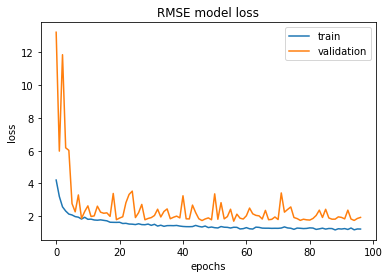

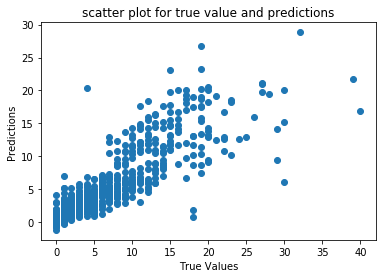

Root Mean Squared error: 2.499
Pearsons correlation: 0.887
R2 score: 0.762


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd

Ytest = pd.DataFrame(Ytest)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RMSE model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
    
#predict all the test set  images       
pred_y = model.predict(Xtest)
y_pred = pd.DataFrame(pred_y)
    
plt.scatter(Ytest, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('scatter plot for true value and predictions')
plt.show()
    
score = mean_squared_error(Ytest, y_pred,squared=False)
print("Root Mean Squared error: %.3f"%score)
    
cor = Ytest[0].corr(y_pred[0])  
print('Pearsons Correlation coefficient: %.3f' % cor)


score_r2 = r2_score(Ytest,y_pred)
print('R2 score: %.3f' % score_r2) 

We can conclude that model is not overfitting since the training and validation curves are close and we can observe the decresing trend.

<i><b>Visualising CNN output on each convolutional layer</b></i>

In [0]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d_4 (?, 150, 150, 8)
4 conv2d_5 (?, 38, 38, 16)
8 conv2d_6 (?, 10, 10, 32)
12 conv2d_7 (?, 3, 3, 64)


<i><b>Convolutional layer 1 with 8 filters</b></i>

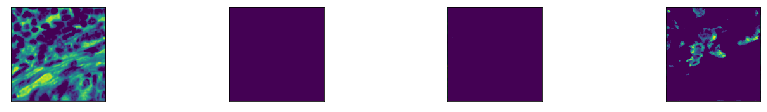

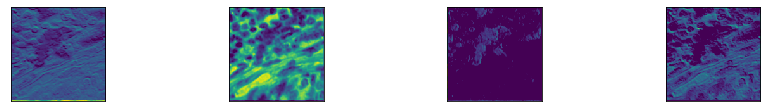

In [0]:
from keras.models import Model

model_8 = Model(inputs=model.inputs, outputs=model.layers[0].output)
# get feature map for first hidden layer
feature_maps = model_8.predict(Xtest)
# plot the output of indivdual filter
square = 4
ix = 1
for _ in range(2):
    for _ in range(4):
    # subplot and  axis

        ax = plt.subplot(square, square, ix)

        ax.set_xticks([])
        ax.set_yticks([])
        # plotting filters 

        plt.imshow(feature_maps[1, :, :, ix-1])
        plt.gcf().set_size_inches(15, 8)
        ix += 1
        #plot the figure
    plt.show()

<i><b>Convolutional layer 2 with 16 filters</b></i>

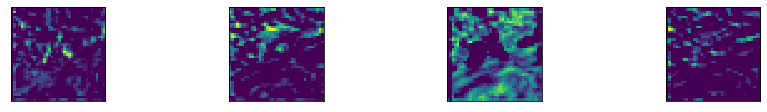

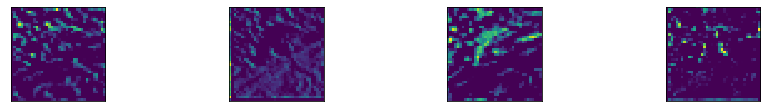

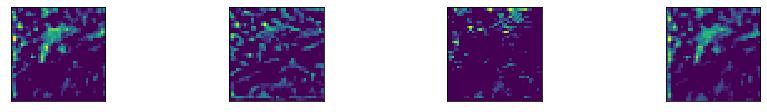

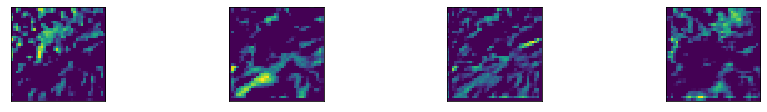

In [0]:
model_16 = Model(inputs=model.inputs, outputs=model.layers[4].output)
# get feature map for first hidden layer
feature= model_16.predict(Xtest)
# plot the output of indivdual filter
square = 4
ix = 1
for _ in range(4):
    for _ in range(4):
    # subplot and  axis

        ax = plt.subplot(square,square, ix)

        ax.set_xticks([])
        ax.set_yticks([])
        # plotting filters 

        plt.imshow(feature[1, :, :, ix-1])
        plt.gcf().set_size_inches(15, 8)
        ix += 1
        # plot the figure
    plt.show()

<i><b>Convolutional layer 3 with 32 filters</b></i>

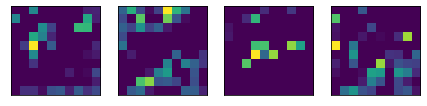

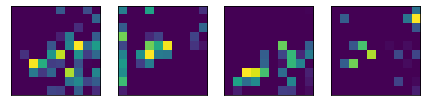

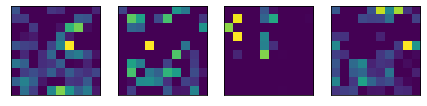

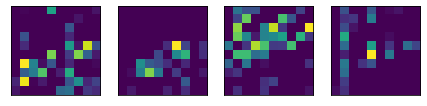

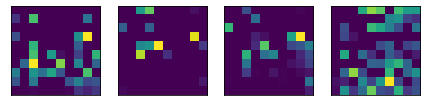

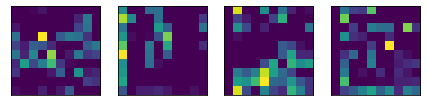

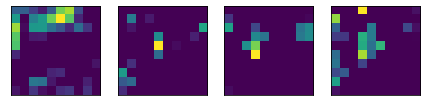

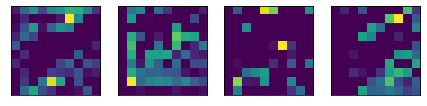

In [0]:
model_32 = Model(inputs=model.inputs, outputs=model.layers[8].output)
# get feature map for first hidden layer
feature_maps = model_32.predict(Xtest)
# plot the output of indivdual filter

ix = 1
for _ in range(8):
    for _ in range(4):
    # subplot and  axis

        ax = plt.subplot(4, 8, ix)

        ax.set_xticks([])
        ax.set_yticks([])
        # plotting filters 

        plt.imshow(feature_maps[1, :, :, ix-1])
        plt.gcf().set_size_inches(15, 8)
        ix += 1
        # plot the figure
    plt.show()

<b>Convolutional layers with 64 filters</b>

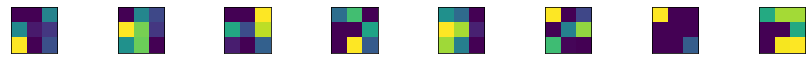

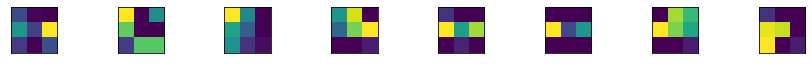

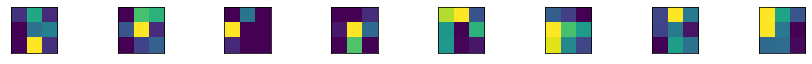

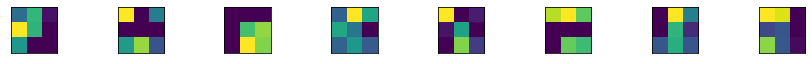

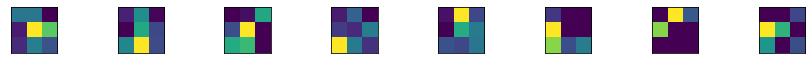

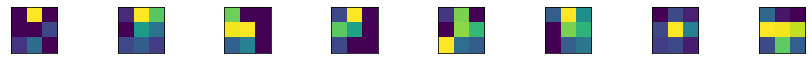

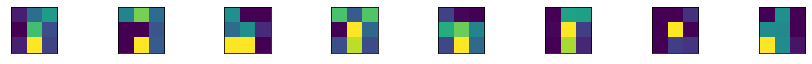

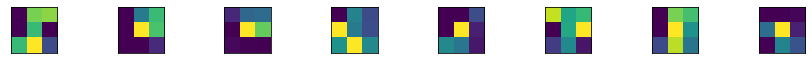

In [0]:
model_64 = Model(inputs=model.inputs, outputs=model.layers[12].output)
# get feature map for first hidden layer
feature_maps = model_64.predict(Xtest)
# plot the output of indivdual filter

ix = 1
for _ in range(8):
    for _ in range(8):
    # subplot and  axis

        ax = plt.subplot(8, 8, ix)

        ax.set_xticks([])
        ax.set_yticks([])
        # plotting filters 

        plt.imshow(feature_maps[1, :, :, ix-1])
        plt.gcf().set_size_inches(15, 8)
        ix += 1
        # plot the figure
    plt.show()

From the above visualisation , we can observe that the feature maps closer to input caputures a lot of fine details in an image such as color and edges etc., as we add more convolutional layers , the feature maps shows less details and understanding the whole image. Though we get good correlation coeffcient between actual labels and predicted labels but it is not clear from the last set of images that the model caputured the lympocytes or not. we generally lose ability to understand the deeper features